In [158]:
"""
1. Import jeopardy.csv and create a dataframe from the data. Find out the following:
    a. How many rows are there in the dataframe? What does a row represent in this
    dataset? What is the “grain”?
    b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
    c. How many unique shows were there each year?
    d. How many times was each category used?
    e. Which month (over the years) has had the most shows?
    f. Are there any answers that appeared multiple times? Find the questions for the top
    three most common answers.

2. Create a visualization that shows the top 5 categories (those referenced the most often). Be
sure to label appropriately
"""

'\n1. Import jeopardy.csv and create a dataframe from the data. Find out the following:\n    a. How many rows are there in the dataframe? What does a row represent in this\n    dataset? What is the “grain”?\n    b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?\n    c. How many unique shows were there each year?\n    d. How many times was each category used?\n    e. Which month (over the years) has had the most shows?\n    f. Are there any answers that appeared multiple times? Find the questions for the top\n    three most common answers.\n\n2. Create a visualization that shows the top 5 categories (those referenced the most often). Be\nsure to label appropriately\n'

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
#1. Import jeopardy.csv and create a dataframe from the data

#set the filename and read into dataframe
csv_filename = "JEOPARDY_CSV.csv"
jeopardy_df = pd.read_csv(csv_filename)
jeopardy_df.columns = jeopardy_df.columns.str.lstrip()
display(jeopardy_df.head())


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [161]:
#a. How many rows are there in the dataframe? What does a row represent in this dataset? What is the “grain”?
print(len(jeopardy_df))

#A row represents a question and its answer in a category for a game show number.

#What is grain? -
#The Grain or Granularity of the table refers to the level of each row in the table. It has more than one row for show number

216930


In [162]:
# b. Clean the data. How do you need to “clean” it? What is “dirty” about this data?
# You can clean by removing any repeating/duplicate rows
jeopardy_df.drop_duplicates() 
# category column has all upper case letter we can make it capitalize
jeopardy_df['Category'] = jeopardy_df['Category'].str.capitalize()


#Create month and year columns
jeopardy_df['Month'] = pd.DatetimeIndex(jeopardy_df['Air Date']).month
jeopardy_df['Year'] = pd.DatetimeIndex(jeopardy_df['Air Date']).year

display(jeopardy_df.head())

,Show Number,Air Date,Round,Category,Value,Question,Answer,Month,Year
0,4680,12/31/2004,Jeopardy!,History,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,12,2004
1,4680,12/31/2004,Jeopardy!,Espn's top 10 all-time athletes,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,12,2004
2,4680,12/31/2004,Jeopardy!,Everybody talks about it...,$200,The city of Yuma in this state has a record av...,Arizona,12,2004
3,4680,12/31/2004,Jeopardy!,The company line,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,12,2004
4,4680,12/31/2004,Jeopardy!,Epitaphs & tributes,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,12,2004


In [163]:
#c. How many unique shows were there each year?
jeopardy_year = jeopardy_df.groupby('Year')
print(jeopardy_year['Show Number'].nunique())

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64


In [164]:
# d. How many times was each category used?
display(jeopardy_df.value_counts('Category') )

Category
Before & after             547
Science                    519
Literature                 496
American history           418
Potpourri                  401
                          ... 
Heraldic symbols             1
Pop music firsts             1
Religious personalities      1
5-letter literary terms      1
Food lore                    1
Length: 27905, dtype: int64

In [165]:
#e. Which month (over the years) has had the most shows?
jeopardy_month = pd.DataFrame(jeopardy_df.value_counts('Month'),columns=['Most shows'])
display(jeopardy_month.sort_values("Month",ascending=False).head(1))


,Most shows
Month,
12,20875


In [192]:
# Are there any answers that appeared multiple times? Find the questions for the top three most common answers.
#Yes there are answers that appeared multiple times. Like below, these are the top 3 most common answers.
most_common_ans = jeopardy_df['Answer'].value_counts().head(3)
print("The questions for the top three most common answers:-")
index = 0
jeopardy_questions = []
qanda_df = pd.DataFrame()
for answer in most_common_ans.index: 
    index=index +1
    jeopardy_df1=  jeopardy_df.query("Answer == '" + answer + "'")
    jeopardy_questions = {"Answer": answer, "Questions": jeopardy_df1["Question"].tolist()}
    qanda_df = pd.concat([qanda_df,pd.DataFrame(jeopardy_questions)])
    #print("\n" + str(index) + ".Questions for answer:" , answer,"\n",jeopardy_df1["Question"].to_string())
    
qanda_df

The questions for the top three most common answers:-


,Answer,Questions
0,China,In 1958 this country launched its second 5-yea...
1,China,"In 1999 this country began 3 ""golden weeks"" of..."
2,China,P.F. Chang's is an upscale bistro specializing...
3,China,This country's National People's Congress has ...
4,China,"Of the 6 nations India borders, this one is th..."
...,...,...
191,Japan,"On Feb. 8, 1904 this country attacked Port Art..."
192,Japan,"This nation's maritime self-defense force, suc..."
193,Japan,"On July 8, 1853 Matthew Perry presented a lett..."
194,Japan,Kirin


In [170]:
#2. Create a visualization that shows the top 5 categories (those referenced the most often). Be sure to label appropriately
#Format from currency to numeric
value_series = pd.to_numeric(jeopardy_df["Value"].replace("[^0-9\.-]","",regex=True))
jeopardy_df["Value"] =  value_series

#Group by category
jeopardy_category = jeopardy_df.groupby('Category')
jeopardy_category_df = jeopardy_category.aggregate({"Question": "count","Value":"sum"})

jeopardy_category_df.rename(columns={"Question": "Question Count"}, inplace=True)

#sort by question Count in descending order and show only first 5 records i.e Top 5 categories
sorted_jeopardy_category_df= jeopardy_category_df.sort_values(["Question Count"], ascending=False).head(5)
display(sorted_jeopardy_category_df.style.format({"Value":"${:,.2f}"}))

,Question Count,Value
Category,,
Before & after,547,"$491,900.00"
Science,519,"$361,221.00"
Literature,496,"$344,900.00"
American history,418,"$235,200.00"
Potpourri,401,"$232,900.00"


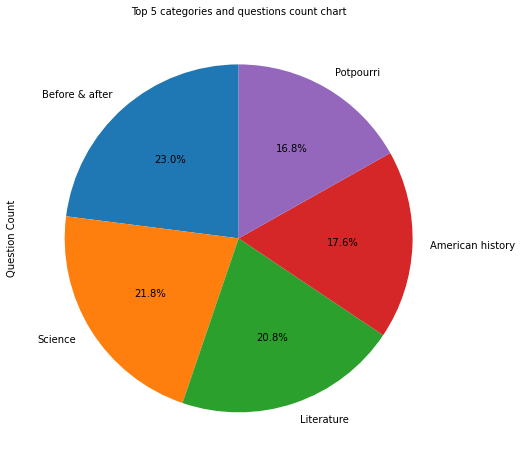

In [172]:
#plot pie chart to display top 5 categories
fig,ax = plt.subplots()
fig.set_size_inches([8,8])
sorted_jeopardy_category_df.plot(kind='pie',y="Question Count",ax=ax,
                                 startangle=90,shadow=False,labels=sorted_jeopardy_category_df.index,
                                 autopct='%1.1f%%',legend=False,fontsize=10)

ax.set_title("Top 5 categories and questions count chart",fontsize=10)
plt.show()